<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(0_8)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_0.8_n250.csv',
 'data_add_delta_0.8_n120.csv',
 'data_add_delta_0.8_n60.csv',
 'data_add_delta_0.8_n30.csv',
 'data_add_delta_0.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,52.500502,63.717616,22.076127,71.936923,-1.348896,218.882272,219.372259,-0.489987
1,0.0,1.0,70.427858,55.690492,35.325084,41.914709,0.587730,213.945873,213.043394,0.902479
2,0.0,2.0,73.458656,22.899774,40.373637,29.712057,-2.737349,173.706775,177.119805,-3.413030
3,0.0,3.0,45.076725,61.155039,79.799378,74.200011,1.862242,272.093396,269.272593,2.820802
4,0.0,4.0,24.393520,41.813749,63.638355,96.613061,-1.245135,235.213550,235.781902,-0.568352
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,54.376510,54.024279,73.504585,75.819064,1.299406,269.023844,268.067900,0.955944
249996,999.0,246.0,72.687231,37.296268,91.549318,46.352887,-0.255999,257.629705,257.098445,0.531260
249997,999.0,247.0,76.548069,68.956671,49.307235,66.405676,10.595574,281.813226,272.206983,9.606243
249998,999.0,248.0,94.246148,56.488447,32.839337,55.169132,5.415970,254.159034,250.057904,4.101131


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,52.500502,63.717616,22.076127,71.936923,-1.348896,218.882272,219.372259,-0.489987
1,0.0,1.0,70.427858,55.690492,35.325084,41.914709,0.587730,213.945873,213.043394,0.902479
2,0.0,2.0,73.458656,22.899774,40.373637,29.712057,-2.737349,173.706775,177.119805,-3.413030
3,0.0,3.0,45.076725,61.155039,79.799378,74.200011,1.862242,272.093396,269.272593,2.820802
4,0.0,4.0,24.393520,41.813749,63.638355,96.613061,-1.245135,235.213550,235.781902,-0.568352
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,54.376510,54.024279,73.504585,75.819064,1.299406,269.023844,268.067900,0.955944
249996,999.0,246.0,72.687231,37.296268,91.549318,46.352887,-0.255999,257.629705,257.098445,0.531260
249997,999.0,247.0,76.548069,68.956671,49.307235,66.405676,10.595574,281.813226,272.206983,9.606243
249998,999.0,248.0,94.246148,56.488447,32.839337,55.169132,5.415970,254.159034,250.057904,4.101131


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    52.500502  63.717616  22.076127  71.936923  -1.348896   
      1.0    70.427858  55.690492  35.325084  41.914709   0.587730   
      2.0    73.458656  22.899774  40.373637  29.712057  -2.737349   
      3.0    45.076725  61.155039  79.799378  74.200011   1.862242   
      4.0    24.393520  41.813749  63.638355  96.613061  -1.245135   
...                ...        ...        ...        ...        ...   
999.0 245.0  54.376510  54.024279  73.504585  75.819064   1.299406   
      246.0  72.687231  37.296268  91.549318  46.352887  -0.255999   
      247.0  76.548069  68.956671  49.307235  66.405676  10.595574   
      248.0  94.246148  56.488447  32.839337  55.169132   5.415970   
      249.0  33.964959  53.663217  73.017981  22.059349  -5.669272   

                      Y       y_hat     e_hat  
rep   index                                    
0.0   0.0    218.882272  219.372259 -0.489987  
      1.0    213.945873  213.043394  0.902479  
      2.0    173.706775  177.119805 -3.413030  
      3.0    272.093396  269.272593  2.820802  
      4.0    235.213550  235.781902 -0.568352  
...                 ...         ...       ...  
999.0 245.0  269.023844  268.067900  0.955944  
      246.0  257.629705  257.098445  0.531260  
      247.0  281.813226  272.206983  9.606243  
      248.0  254.159034  250.057904  4.101131  
      249.0  187.036234  191.177449 -4.141215  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    52.500502  63.717616  22.076127  71.936923  -1.348896   
      1.0    70.427858  55.690492  35.325084  41.914709   0.587730   
      2.0    73.458656  22.899774  40.373637  29.712057  -2.737349   
      3.0    45.076725  61.155039  79.799378  74.200011   1.862242   
      4.0    24.393520  41.813749  63.638355  96.613061  -1.245135   
...                ...        ...        ...        ...        ...   
999.0 245.0  54.376510  54.024279  73.504585  75.819064   1.299406   
      246.0  72.687231  37.296268  91.549318  46.352887  -0.255999   
      247.0  76.548069  68.956671  49.307235  66.405676  10.595574   
      248.0  94.246148  56.488447  32.839337  55.169132   5.415970   
      249.0  33.964959  53.663217  73.017981  22.059349  -5.669272   

                      Y       y_hat     e_hat  
rep   index                                    
0.0   0.0    218.882272  219.372259 -0.489987  
      1.0    213.945873  213.043394  0.902479  
      2.0    173.706775  177.119805 -3.413030  
      3.0    272.093396  269.272593  2.820802  
      4.0    235.213550  235.781902 -0.568352  
...                 ...         ...       ...  
999.0 245.0  269.023844  268.067900  0.955944  
      246.0  257.629705  257.098445  0.531260  
      247.0  281.813226  272.206983  9.606243  
      248.0  254.159034  250.057904  4.101131  
      249.0  187.036234  191.177449 -4.141215  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,52.500502,63.717616,22.076127,71.936923,-1.348896,218.882272,219.372259,-0.489987
1,0.0,1.0,70.427858,55.690492,35.325084,41.914709,0.587730,213.945873,213.043394,0.902479
2,0.0,2.0,73.458656,22.899774,40.373637,29.712057,-2.737349,173.706775,177.119805,-3.413030
3,0.0,3.0,45.076725,61.155039,79.799378,74.200011,1.862242,272.093396,269.272593,2.820802
4,0.0,4.0,24.393520,41.813749,63.638355,96.613061,-1.245135,235.213550,235.781902,-0.568352
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,54.376510,54.024279,73.504585,75.819064,1.299406,269.023844,268.067900,0.955944
249996,999.0,246.0,72.687231,37.296268,91.549318,46.352887,-0.255999,257.629705,257.098445,0.531260
249997,999.0,247.0,76.548069,68.956671,49.307235,66.405676,10.595574,281.813226,272.206983,9.606243
249998,999.0,248.0,94.246148,56.488447,32.839337,55.169132,5.415970,254.159034,250.057904,4.101131


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    52.500502  63.717616  22.076127  71.936923  -1.348896   
      1.0    70.427858  55.690492  35.325084  41.914709   0.587730   
      2.0    73.458656  22.899774  40.373637  29.712057  -2.737349   
      3.0    45.076725  61.155039  79.799378  74.200011   1.862242   
      4.0    24.393520  41.813749  63.638355  96.613061  -1.245135   
...                ...        ...        ...        ...        ...   
999.0 245.0  54.376510  54.024279  73.504585  75.819064   1.299406   
      246.0  72.687231  37.296268  91.549318  46.352887  -0.255999   
      247.0  76.548069  68.956671  49.307235  66.405676  10.595574   
      248.0  94.246148  56.488447  32.839337  55.169132   5.415970   
      249.0  33.964959  53.663217  73.017981  22.059349  -5.669272   

                      Y       y_hat     e_hat  
rep   index                                    
0.0   0.0    218.882272  219.372259 -0.489987  
      1.0    213.945873  213.043394  0.902479  
      2.0    173.706775  177.119805 -3.413030  
      3.0    272.093396  269.272593  2.820802  
      4.0    235.213550  235.781902 -0.568352  
...                 ...         ...       ...  
999.0 245.0  269.023844  268.067900  0.955944  
      246.0  257.629705  257.098445  0.531260  
      247.0  281.813226  272.206983  9.606243  
      248.0  254.159034  250.057904  4.101131  
      249.0  187.036234  191.177449 -4.141215  

[250000 rows x 8 columns]

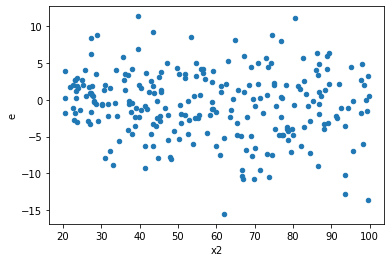

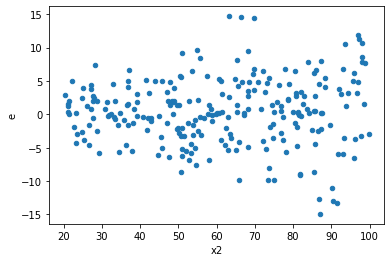

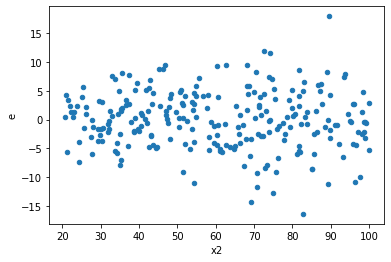

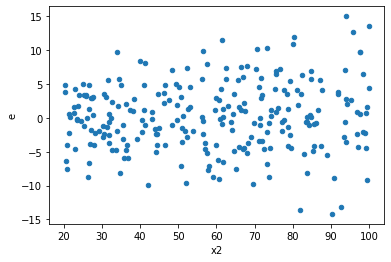

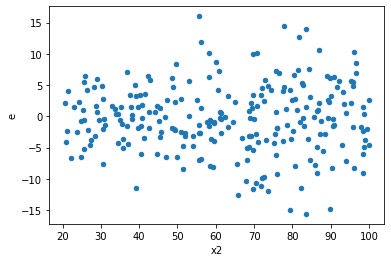

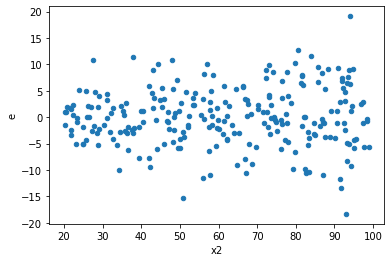

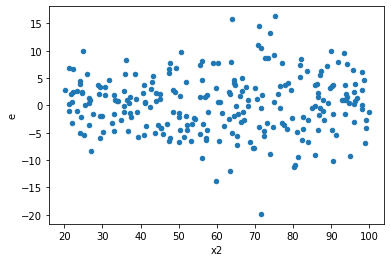

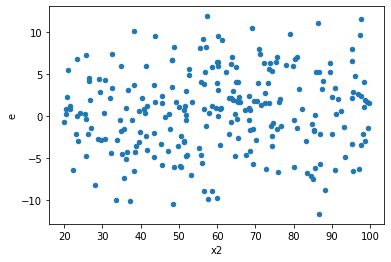

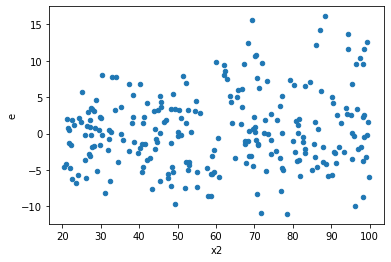

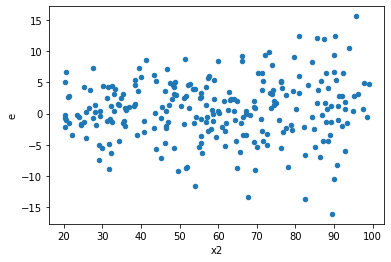

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,96.0,96.0,1565.9903763500267,2446.406174217683,16.312399753646112,25.483397648100865,1.562210222466187,0.029942897759654308,0.9850285511201728,0.014971448879827154,Reject005=0 : Heteroscedasticity
1.0,96.0,96.0,1515.663512567975,3122.6797084946907,15.78816158924974,32.52791363015303,2.0602724038688263,0.0004745920395434755,0.9997627039802283,0.00023729601977173775,Reject005=0 : Heteroscedasticity
2.0,96.0,96.0,1621.1748682985306,2765.8590473269987,16.887238211443027,28.81103174298957,1.70608310146693,0.009459222146442903,0.9952703889267785,0.004729611073221451,Reject005=0 : Heteroscedasticity
3.0,96.0,96.0,1885.7385050265907,2856.866104451938,19.64310942736032,29.759021921374355,1.5149852945340656,0.04311819238094805,0.978440903809526,0.021559096190474025,Reject005=0 : Heteroscedasticity
4.0,96.0,96.0,2394.863109127121,3364.388635351327,24.946490720074177,35.04571495157632,1.4048354674341192,0.09752571949394273,0.9512371402530286,0.048762859746971365,Reject005=1 : Homoscedasticity
5.0,96.0,96.0,1921.3710437704476,4141.879520906961,20.014281705942164,43.14457834278085,2.155689570911325,0.0002083858382357917,0.9998958070808821,0.00010419291911789585,Reject005=0 : Heteroscedasticity
6.0,96.0,96.0,2347.1383721132684,3284.0281037889126,24.449358042846544,34.208626081134504,1.3991625473840754,0.10156005523989742,0.9492199723800513,0.05078002761994871,Reject005=1 : Homoscedasticity
7.0,96.0,96.0,2090.4226033489363,2095.97099852069,21.77523545155142,21.83303123459052,1.0026541978463421,0.9896661988762991,0.5051669005618504,0.49483309943814957,Reject005=1 : Homoscedasticity
8.0,96.0,96.0,2092.9209924724023,3200.447741279902,21.801260338254192,33.33799730499898,1.5291775240398155,0.0386747363879818,0.9806626318060091,0.0193373681939909,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,1565.9903763500267,2446.406174217683,16.312399753646112,25.483397648100865,1.562210222466187,0.029942897759654308,Reject005=0 : Heteroscedasticity
1.0,96.0,96.0,1515.663512567975,3122.6797084946907,15.78816158924974,32.52791363015303,2.0602724038688263,0.0004745920395434755,Reject005=0 : Heteroscedasticity
2.0,96.0,96.0,1621.1748682985306,2765.8590473269987,16.887238211443027,28.81103174298957,1.70608310146693,0.009459222146442903,Reject005=0 : Heteroscedasticity
3.0,96.0,96.0,1885.7385050265907,2856.866104451938,19.64310942736032,29.759021921374355,1.5149852945340656,0.04311819238094805,Reject005=0 : Heteroscedasticity
4.0,96.0,96.0,2394.863109127121,3364.388635351327,24.946490720074177,35.04571495157632,1.4048354674341192,0.09752571949394273,Reject005=1 : Homoscedasticity
5.0,96.0,96.0,1921.3710437704476,4141.879520906961,20.014281705942164,43.14457834278085,2.155689570911325,0.0002083858382357917,Reject005=0 : Heteroscedasticity
6.0,96.0,96.0,2347.1383721132684,3284.0281037889126,24.449358042846544,34.208626081134504,1.3991625473840754,0.10156005523989742,Reject005=1 : Homoscedasticity
7.0,96.0,96.0,2090.4226033489363,2095.97099852069,21.77523545155142,21.83303123459052,1.0026541978463421,0.9896661988762991,Reject005=1 : Homoscedasticity
8.0,96.0,96.0,2092.9209924724023,3200.447741279902,21.801260338254192,33.33799730499898,1.5291775240398155,0.0386747363879818,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      665
Reject005=0 : Heteroscedasticity    335
Name: Result_test, dtype: int64